In [1]:
import numpy as np
import pandas as pd
import numpy.random as random
import numpy.linalg as linalg
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')
from sklearn.decomposition import PCA

In [2]:
data = pd.read_csv('data/clean_data.csv')
data.head()

,0,1,2,3,4,5,6,7,8,9,...,7120,7121,7122,7123,7124,7125,7126,7127,7128,class
0,-214,-153,-58,88,-295,-558,199,-176,252,206,...,511,-125,389,-37,793,329,36,191,-37,0
1,-139,-73,-1,283,-264,-400,-330,-168,101,74,...,837,-36,442,-17,782,295,11,76,-14,0
2,-76,-49,-307,309,-376,-650,33,-367,206,-215,...,1199,33,168,52,1138,777,41,228,-41,0
3,-135,-114,265,12,-419,-585,158,-253,49,31,...,835,218,174,-110,627,170,-50,126,-91,0
4,-106,-125,-76,168,-230,-284,4,-122,70,252,...,649,57,504,-26,250,314,14,56,-25,0


In [3]:
X = data.drop('class',axis=1)
y = data['class']

# PCA

In [111]:
#note : if A is symmetric, U = eigenvectors of A
#u,d,v_t = linalg.svd(cov_X)

In [480]:
# So it doesn't take too long
X.columns = pd.to_numeric(X.columns)
X = X[list(range(3000))]

In [481]:
X_scaled = X - X.mean()

In [482]:
cov_X = np.cov(X_scaled.T)

In [483]:
#eigh is specially for symmetric matrices
eig_values, eig_vectors = linalg.eigh(cov_X)
#The covariance matrix is a Symmetric matrix, therefore the eigenvalues will be all real.
#I used np.real just to get rid of 0.00j of numpy
eig_values, eig_vectors=np.real(eig_values),np.real(eig_vectors) 

In [484]:
idx = eig_values.argsort()[::-1]   
eig_values = eig_values[idx]
eig_vectors = eig_vectors[:,idx]

In [485]:
best_eig_values = eig_values[:50]
best_eig_vectors = eig_vectors[:,:50]

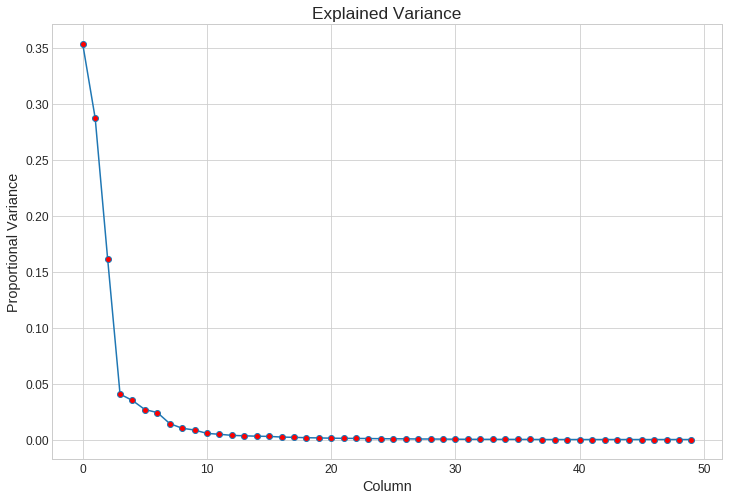

In [515]:
explained_variance = (best_eig_values*best_eig_values)/best_eig_values.dot(best_eig_values)
plt.figure(figsize=(12,8))
plt.title('Explained Variance',size='xx-large')
plt.xlabel('Column',size='x-large')
plt.xticks(size='large')
plt.ylabel('Proportional Variance',size='x-large')
plt.yticks(size='large')
plt.plot(explained_variance,marker='o',markerfacecolor='red')

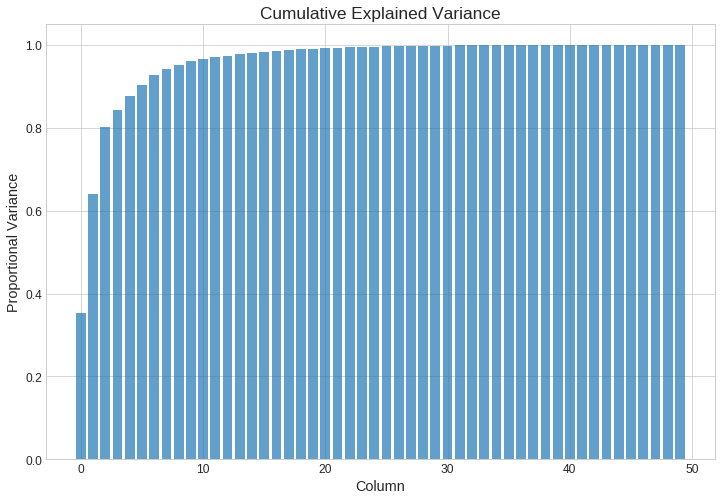

In [489]:
plt.figure(figsize=(12,8))
plt.title('Cumulative Explained Variance',size='xx-large')
plt.xlabel('Column',size='x-large')
plt.xticks(size='large')
plt.ylabel('Proportional Variance',size='x-large')
plt.yticks(size='large')
plt.bar(range(50),explained_variance.cumsum(),alpha=.7)
plt.show()

### 100% of the variance with just 37 columns

In [499]:
reduced_X_scaled = X_scaled.dot(best_eig_vectors)

In [500]:
pd.DataFrame(reduced_X_scaled).head(7)

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,7909.254692,-9386.029035,-4865.089589,16477.131144,7971.334980,587.684977,-599.494007,7393.377020,-7636.970373,7783.349987,...,-1.193712e-11,2.017941e-11,-2.209077e-11,-4.535039e-12,-6.906475e-12,4.988010e-12,-4.861889e-12,1.034550e-11,1.154632e-11,-7.474910e-12
1,-22377.524380,3600.215798,-11789.092316,-14306.994808,5414.989226,-578.864398,-11390.386607,15424.735209,-2745.831222,-8211.093848,...,5.812240e-12,-5.485390e-12,7.116085e-12,3.588241e-12,-1.874056e-12,-3.403500e-12,-5.542233e-13,-5.419665e-12,1.071498e-11,7.361223e-12
2,-2563.361442,630.017352,-33370.003786,-6206.611204,-1687.884297,-11024.510570,-12194.265049,-2478.877594,-3609.345015,8316.133357,...,2.361844e-11,-1.582379e-11,8.739676e-13,1.849187e-11,6.625367e-12,-6.963319e-13,-1.269385e-11,9.016787e-12,-5.735856e-12,2.174261e-12
3,-205.942463,-8549.412900,720.034853,7285.546242,-2495.767422,1717.152490,6965.194283,1802.864454,5015.287665,9650.931787,...,6.309619e-12,-2.654232e-11,-1.879386e-12,2.650324e-12,1.777600e-11,1.349676e-11,-9.258372e-12,-4.760636e-13,-1.369926e-11,6.526335e-12
4,-12898.106694,-9049.776402,-1193.881665,3872.961704,-10516.987522,4551.553712,13625.252651,-467.134940,5834.045664,2931.096252,...,-6.622258e-12,-1.129763e-12,8.668621e-13,-2.835066e-12,-8.915535e-12,-1.064393e-11,4.632739e-12,4.753531e-12,3.609557e-12,-1.404032e-11
5,31051.643985,15763.881490,-33684.234426,-5692.594314,-5350.051117,810.374282,-3156.038520,-17513.460785,-3130.190263,-2900.463243,...,9.833911e-12,6.558309e-12,-8.337331e-12,1.548983e-11,-3.822720e-12,-2.235367e-11,2.094680e-11,1.401190e-11,-2.504663e-12,1.293188e-11
6,28171.127906,-4763.152298,-5163.761193,27677.767247,4362.891489,-19738.981606,2648.611897,7295.539742,2563.854743,-3434.416152,...,2.044231e-11,8.299139e-12,-3.900880e-12,-7.730705e-12,-2.025047e-12,3.311129e-12,-4.566125e-12,2.401634e-12,4.163780e-12,4.433787e-12


# Sklearn PCA

In [502]:
#max n_components for PCA() = min(X_scaled.shape)
pca = PCA(n_components=38)
pca_reduced_X_scaled = pca.fit_transform(X_scaled)

In [503]:
pd.DataFrame(pca_reduced_X_scaled).head(7)

,0,1,2,3,4,5,6,7,8,9,...,28,29,30,31,32,33,34,35,36,37
0,-7909.254692,9386.029035,-4865.089589,16477.131144,7971.334980,-587.684977,599.494007,-7393.377020,-7636.970373,-7783.349987,...,2749.663872,3096.227466,6692.539835,6167.604804,-222.559934,796.085709,6017.383329,45.197648,-1677.336184,7.906302e-12
1,22377.524380,-3600.215798,-11789.092316,-14306.994808,5414.989226,578.864398,11390.386607,-15424.735209,-2745.831222,8211.093848,...,4426.891683,-648.004951,554.888759,2909.181354,798.288903,1266.845839,1085.425413,545.477107,536.129760,7.906302e-12
2,2563.361442,-630.017352,-33370.003786,-6206.611204,-1687.884297,11024.510570,12194.265049,2478.877594,-3609.345015,-8316.133357,...,4684.906601,-7697.876911,1524.960316,-346.265126,-3604.530447,2221.533969,-3720.647088,-1682.329404,1743.633524,7.906302e-12
3,205.942463,8549.412900,720.034853,7285.546242,-2495.767422,-1717.152490,-6965.194283,-1802.864454,5015.287665,-9650.931787,...,1095.875217,2829.372362,1344.065605,2576.412190,8813.738335,-1896.506183,-1069.325982,160.410130,8394.532455,7.906302e-12
4,12898.106694,9049.776402,-1193.881665,3872.961704,-10516.987522,-4551.553712,-13625.252651,467.134940,5834.045664,-2931.096252,...,1874.764945,1885.575331,-1123.823333,8313.357903,-7209.168352,-629.019202,-4473.111590,3857.666671,-1706.005841,7.906302e-12
5,-31051.643985,-15763.881490,-33684.234426,-5692.594314,-5350.051117,-810.374282,3156.038520,17513.460785,-3130.190263,2900.463243,...,-2615.776044,1942.122206,5595.111362,3.500830,2779.722870,-5056.534004,-3855.038930,2507.878494,-4137.072152,7.906302e-12
6,-28171.127906,4763.152298,-5163.761193,27677.767247,4362.891489,19738.981606,-2648.611897,-7295.539742,2563.854743,3434.416152,...,332.693126,-1223.348928,-1656.806252,-1639.314169,-1661.520134,1682.962050,-902.311393,1365.698147,616.960121,7.906302e-12


In [504]:
#eigenvectors
pca.components_

array([[ 1.05678527e-04,  7.13750617e-05, -7.31021518e-04, ...,
         9.89220967e-03,  1.48675279e-03,  1.41290352e-03],
       [-8.69846595e-05, -9.39485394e-04, -1.68537662e-03, ...,
        -2.67948458e-02, -3.08278575e-04,  2.67863200e-04],
       [ 9.23353750e-05, -7.76285940e-04, -1.17546907e-03, ...,
         2.23642779e-02, -1.66343511e-03, -8.66894214e-04],
       ...,
       [-3.38016950e-03,  3.17108128e-04,  4.91046265e-04, ...,
         1.75324092e-02, -6.34712012e-02, -6.68841086e-03],
       [ 3.79596688e-03, -6.48234582e-04,  9.46432558e-03, ...,
        -7.08724910e-03, -1.16082343e-02,  7.32757341e-03],
       [-1.15661441e-01,  5.34833837e-01, -3.68609391e-01, ...,
        -3.44017151e-03, -3.54774369e-04, -1.23441588e-03]])

In [505]:
best_eig_vectors

array([[-1.05678527e-04,  8.69846595e-05,  9.23353750e-05, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-7.13750617e-05,  9.39485394e-04, -7.76285940e-04, ...,
         6.35604057e-03, -2.12485036e-02,  9.51721162e-02],
       [ 7.31021518e-04,  1.68537662e-03, -1.17546907e-03, ...,
         5.55830074e-03,  3.08621510e-02,  6.53282603e-02],
       ...,
       [-9.89220967e-03,  2.67948458e-02,  2.23642779e-02, ...,
         6.82904545e-03, -4.10941356e-02, -1.06159426e-02],
       [-1.48675279e-03,  3.08278575e-04, -1.66343511e-03, ...,
         1.97640345e-03, -1.07211501e-02, -8.64926788e-03],
       [-1.41290352e-03, -2.67863200e-04, -8.66894214e-04, ...,
        -4.51685528e-04, -8.94484321e-04, -8.12885273e-04]])

In [518]:
#eigenvalues
pca.explained_variance_

array([3.25527940e+08, 2.93517688e+08, 2.20272465e+08, 1.10365335e+08,
       1.02308613e+08, 8.96426393e+07, 8.50580896e+07, 6.54367431e+07,
       5.49634650e+07, 5.05017985e+07, 4.04577636e+07, 3.75984511e+07,
       3.34487452e+07, 3.15663911e+07, 2.99417893e+07, 2.89801176e+07,
       2.57937751e+07, 2.41946372e+07, 2.20909647e+07, 2.08435795e+07,
       1.91183318e+07, 1.79305113e+07, 1.72433476e+07, 1.63909054e+07,
       1.49623309e+07, 1.41247113e+07, 1.36974334e+07, 1.20899997e+07,
       1.19414364e+07, 1.06834732e+07, 9.48820645e+06, 7.98400082e+06,
       7.22865835e+06, 6.94790459e+06, 6.49366447e+06, 5.98463358e+06,
       5.42799334e+06, 6.41990664e-23])

In [519]:
best_eig_values[:38]

array([3.25527940e+08, 2.93517688e+08, 2.20272465e+08, 1.10365335e+08,
       1.02308613e+08, 8.96426393e+07, 8.50580896e+07, 6.54367431e+07,
       5.49634650e+07, 5.05017985e+07, 4.04577636e+07, 3.75984511e+07,
       3.34487452e+07, 3.15663911e+07, 2.99417893e+07, 2.89801176e+07,
       2.57937751e+07, 2.41946372e+07, 2.20909647e+07, 2.08435795e+07,
       1.91183318e+07, 1.79305113e+07, 1.72433476e+07, 1.63909054e+07,
       1.49623309e+07, 1.41247113e+07, 1.36974334e+07, 1.20899997e+07,
       1.19414364e+07, 1.06834732e+07, 9.48820645e+06, 7.98400082e+06,
       7.22865835e+06, 6.94790459e+06, 6.49366447e+06, 5.98463358e+06,
       5.42799334e+06, 2.10038978e-07])

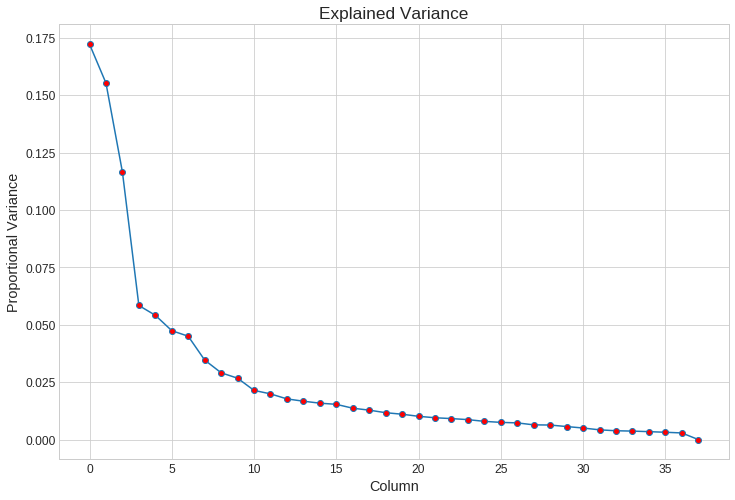

In [520]:
plt.figure(figsize=(12,8))
plt.title('Explained Variance',size='xx-large')
plt.xlabel('Column',size='x-large')
plt.xticks(size='large')
plt.ylabel('Proportional Variance',size='x-large')
plt.yticks(size='large')
plt.plot(pca.explained_variance_ratio_,marker='o',markerfacecolor='red')

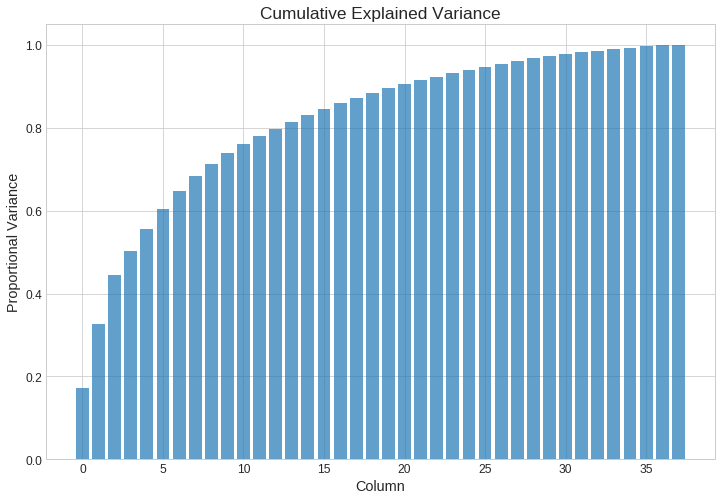

In [523]:
plt.figure(figsize=(12,8))
plt.title('Cumulative Explained Variance',size='xx-large')
plt.xlabel('Column',size='x-large')
plt.xticks(size='large')
plt.ylabel('Proportional Variance',size='x-large')
plt.yticks(size='large')
plt.bar(range(38),pca.explained_variance_ratio_.cumsum(),alpha=.7)
plt.show()